<h1 align=center><font size = 6><b>Used phones price estimation</b></font></h1>

<h3 align=center><font size = 3><b>A project by Boris Y. Nedyalkov</b></font></h3>
<h3 align=center><font size = 3>With data from https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data?resource=download</font></h3>

<center> <img src="https://thumbs.dreamstime.com/b/smartphones-mobile-phones-tablet-computers-creative-abstract-mobility-digital-wireless-communication-technology-business-126155999.jpg" width=700, height=700 /></center> 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [82]:
df = pd.read_csv("used_device_data.csv")

## Data overlook stage

In [83]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [85]:
# applying de-normalization of the prices to see the real price (in USD)
df['used_price'] = 67.91*df['normalized_used_price']
df['new_price'] = 67.91*df['normalized_new_price']

In [86]:
# get some statistics on the dataset
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,used_price,new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107,296.407597,355.380308
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637,39.993124,46.425778
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422,104.368653,197.035540
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342,273.944244,325.312115
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892,299.152556,356.248515
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718,322.959588,385.302206
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841,449.525695,532.946859


In [87]:
df['screen_size'].isnull().sum()

0

In [88]:
#removing the tablets (so we just get phone data)
df['screen_size'] = df['screen_size'].apply(lambda x: x if x <= 20.5 else 'NaN')
df['screen_size'] = df['screen_size'].replace('NaN', np.nan)

In [89]:
df['screen_size'].isnull().sum()

142

In [90]:
df.describe(include=['object'])

,device_brand,os,4g,5g
count,3454,3454,3454,3454
unique,34,4,2,2
top,Others,Android,yes,no
freq,502,3214,2335,3302


In [91]:
df.corr()

C:\Users\Smelly_Giraffe\AppData\Local\Temp\ipykernel_7908\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,used_price,new_price
screen_size,1.000000,0.280873,0.435874,0.093639,0.365057,0.769483,0.744652,0.492757,-0.394536,0.645573,0.476937,0.645573,0.476937
rear_camera_mp,0.280873,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655,0.587302,0.541655
front_camera_mp,0.435874,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479,0.608074,0.475479
internal_memory,0.093639,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992,0.190993,0.195992
ram,0.365057,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056,0.520289,0.532056
battery,0.769483,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754,0.613619,0.470754
weight,0.744652,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540,0.382354,0.269540
release_year,0.492757,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689,0.509790,0.303689
days_used,-0.394536,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625,-0.358264,-0.216625
normalized_used_price,0.645573,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496,1.000000,0.834496


Text(0.5, 1.0, 'Missing values heatmap')

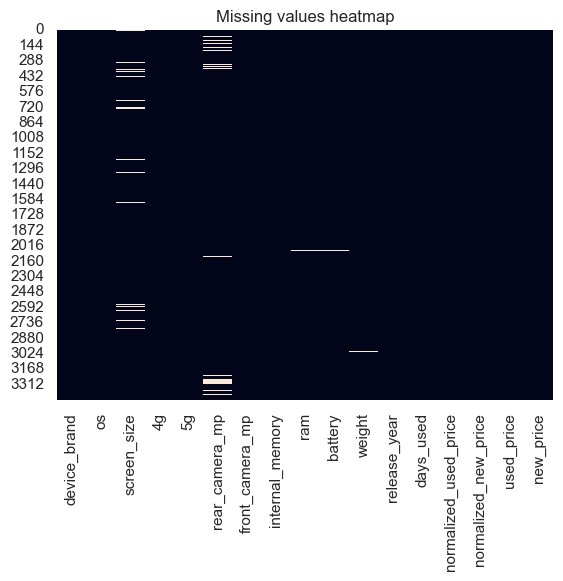

In [92]:
# look for missing values
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [93]:
# lets see what's up all those missing values from "rear_camera_mp"
df_nans = df[df['rear_camera_mp'].isna()]
df_nans

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,used_price,new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642,290.795249,312.225863
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780,296.332623,319.976974
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460,283.961541,305.965812
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166,309.346646,312.533071
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297,299.936031,330.809752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974,310.380972,350.413863
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424,307.022972,344.604102
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753,324.487473,337.292201
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317,388.127090,479.398210


In [94]:
df_nans['device_brand'].value_counts()

Realme        36
Xiaomi        23
Oppo          20
Motorola      18
OnePlus       17
Meizu         15
Vivo          14
Infinix       10
Sony           7
ZTE            4
Asus           4
BlackBerry     4
Coolpad        3
Lava           2
Panasonic      2
Name: device_brand, dtype: int64

In [95]:
df['device_brand'].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: device_brand, dtype: int64

In [96]:
df_nans['os'].value_counts()

Android    179
Name: os, dtype: int64

In [97]:
df['os'].value_counts()  

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

In [98]:
df_nans.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,used_price,new_price
count,179.000000,0.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,15.845587,NaN,15.458101,102.793296,5.480447,4304.134078,189.718436,2019.603352,287.117318,4.841868,5.590709,328.811273,379.665032
std,0.973714,NaN,7.717788,62.725877,2.450271,589.947345,18.008417,0.648412,129.705642,0.467409,0.707187,31.741741,48.025074
min,10.290000,NaN,5.000000,32.000000,2.000000,2870.000000,150.000000,2017.000000,91.000000,2.667228,3.690877,181.131468,250.647488
25%,15.340000,NaN,8.000000,64.000000,4.000000,4000.000000,178.000000,2019.000000,194.500000,4.538136,5.036699,308.184809,342.042207
50%,15.390000,NaN,16.000000,128.000000,6.000000,4200.000000,190.200000,2020.000000,273.000000,4.852499,5.602672,329.533201,380.477467
75%,16.640000,NaN,16.000000,128.000000,8.000000,5000.000000,202.500000,2020.000000,348.500000,5.131098,6.183497,348.452881,419.921265
max,17.810000,NaN,32.000000,256.000000,12.000000,6000.000000,253.000000,2020.000000,875.000000,5.792038,7.090785,393.337268,481.535204


In [99]:
df_nans.describe(include=['object'])

,device_brand,os,4g,5g
count,179,179,179,179
unique,15,1,1,2
top,Realme,Android,yes,no
freq,36,179,179,112


array([[<AxesSubplot: xlabel='rear_camera_mp', ylabel='rear_camera_mp'>,
        <AxesSubplot: xlabel='front_camera_mp', ylabel='rear_camera_mp'>,
        <AxesSubplot: xlabel='release_year', ylabel='rear_camera_mp'>],
       [<AxesSubplot: xlabel='rear_camera_mp', ylabel='front_camera_mp'>,
        <AxesSubplot: xlabel='front_camera_mp', ylabel='front_camera_mp'>,
        <AxesSubplot: xlabel='release_year', ylabel='front_camera_mp'>],
       [<AxesSubplot: xlabel='rear_camera_mp', ylabel='release_year'>,
        <AxesSubplot: xlabel='front_camera_mp', ylabel='release_year'>,
        <AxesSubplot: xlabel='release_year', ylabel='release_year'>]],
      dtype=object)

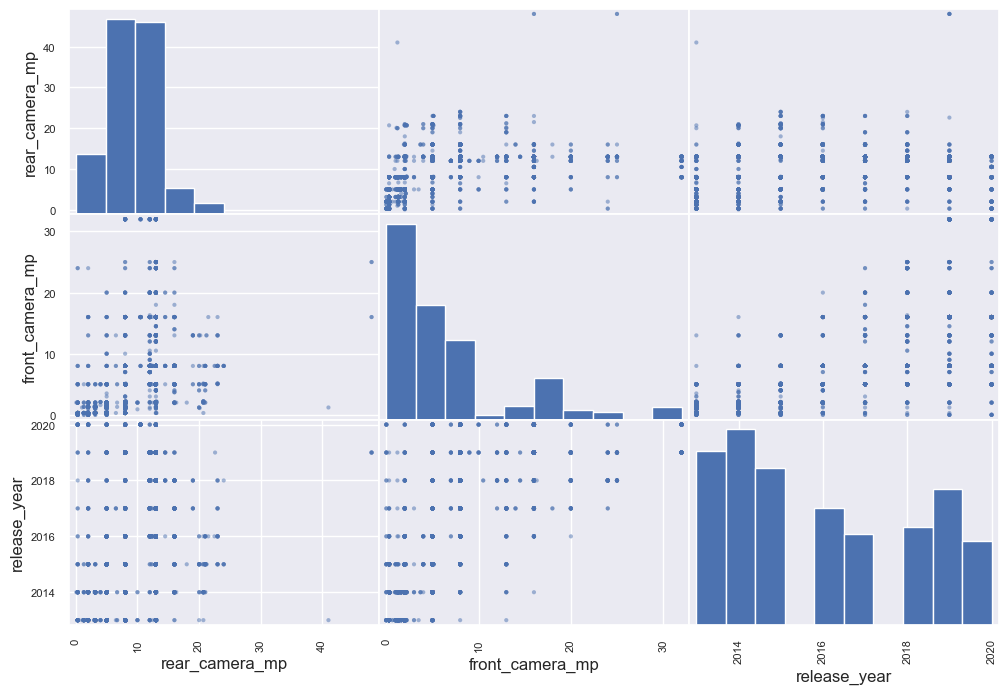

In [100]:
# the "front_camera_mp" and "release_year" seem to have high correlation with 'rear_camera_mp', where the Nan values are
# lets see if we can see some pattern and use it to replace the NaN values of 'rear_camera_mp' instead of deleting them
pd.plotting.scatter_matrix(df[['rear_camera_mp','front_camera_mp','release_year']], figsize=(12, 8))

In [101]:
# We could remove the Nan valued phones from the set, as there doesn't seem to be a reason to think this would create a bias in the subsiquently cleaned of NaNs dataset

In [102]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [103]:
df.isnull().sum()

index                    0
device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
used_price               0
new_price                0
dtype: int64

In [104]:
df["release_year"].value_counts()

2014    611
2013    542
2015    487
2019    382
2016    368
2018    296
2017    285
2020    141
Name: release_year, dtype: int64

In [105]:
df.drop(df[df.release_year == 2022].index, inplace=True)

In [106]:
df["release_year"].value_counts()

2014    611
2013    542
2015    487
2019    382
2016    368
2018    296
2017    285
2020    141
Name: release_year, dtype: int64

## Preliminary data analisys stage

C:\Users\Smelly_Giraffe\AppData\Local\Temp\ipykernel_7908\238410793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),
C:\Users\Smelly_Giraffe\AppData\Local\Temp\ipykernel_7908\238410793.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  xticklabels=df.corr().columns,
C:\Users\Smelly_Giraffe\AppData\Local\Temp\ipykernel_7908\238410793.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yticklabels=df.corr().columns)


<AxesSubplot: >

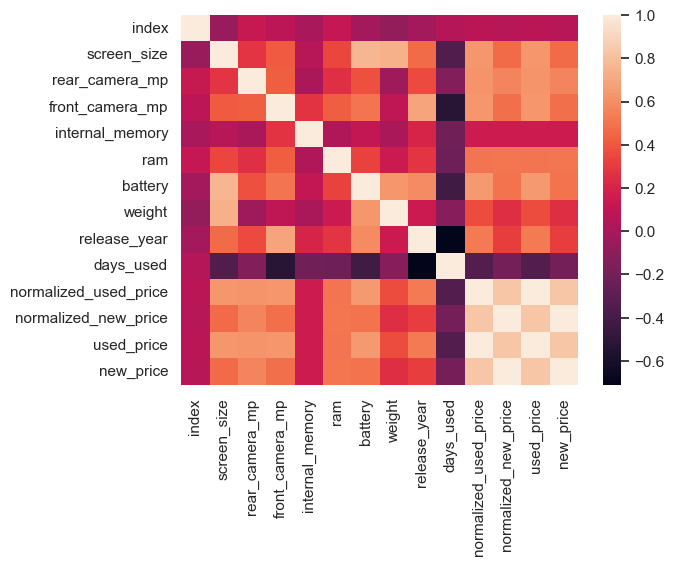

In [107]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

In [108]:
df.corr()

C:\Users\Smelly_Giraffe\AppData\Local\Temp\ipykernel_7908\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,used_price,new_price
index,1.000000,-0.055733,0.130824,0.084292,0.000255,0.113480,-0.020860,-0.079267,-0.021453,0.046591,0.075620,0.061871,0.075620,0.061871
screen_size,-0.055733,1.000000,0.272940,0.409000,0.060731,0.345268,0.760407,0.745185,0.465626,-0.355096,0.630792,0.466904,0.630792,0.466904
rear_camera_mp,0.130824,0.272940,1.000000,0.420837,0.004694,0.256207,0.378651,-0.032642,0.358403,-0.143970,0.624954,0.562474,0.624954,0.562474
front_camera_mp,0.084292,0.409000,0.420837,1.000000,0.267204,0.419297,0.504409,0.093584,0.691784,-0.527987,0.628920,0.483882,0.628920,0.483882
internal_memory,0.000255,0.060731,0.004694,0.267204,1.000000,0.036880,0.109049,0.015719,0.202503,-0.215311,0.146567,0.151501,0.146567,0.151501
ram,0.113480,0.345268,0.256207,0.419297,0.036880,1.000000,0.328219,0.143166,0.272438,-0.226094,0.501997,0.507014,0.501997,0.507014
battery,-0.020860,0.760407,0.378651,0.504409,0.109049,0.328219,1.000000,0.627337,0.590121,-0.418942,0.644491,0.497327,0.644491,0.497327
weight,-0.079267,0.745185,-0.032642,0.093584,0.015719,0.143166,0.627337,1.000000,0.139898,-0.125738,0.364756,0.248728,0.364756,0.248728
release_year,-0.021453,0.465626,0.358403,0.691784,0.202503,0.272438,0.590121,0.139898,1.000000,-0.710070,0.523029,0.305404,0.523029,0.305404
days_used,0.046591,-0.355096,-0.143970,-0.527987,-0.215311,-0.226094,-0.418942,-0.125738,-0.710070,1.000000,-0.339886,-0.197586,-0.339886,-0.197586


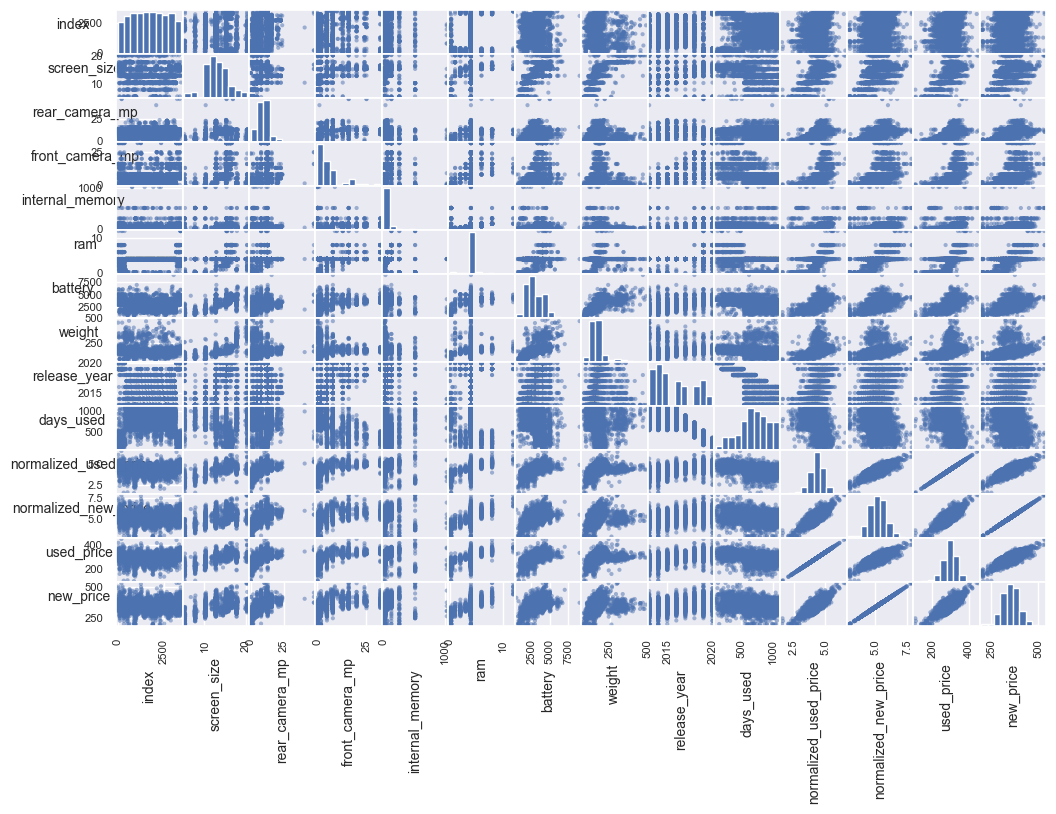

In [109]:
fig = pd.plotting.scatter_matrix(df, figsize=(12, 8))

for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

In [110]:
df['cat_price'], cut_bin = pd.qcut(df['used_price'], q = 5, labels = ['1', '2', '3', '4', '5'], retbins = True)
df.head()

df_cat = df[['ram','os','4g','5g','release_year','cat_price']].copy()

In [111]:
df_cat

,ram,os,4g,5g,release_year,cat_price
0,3.0,Android,yes,no,2020,3
1,8.0,Android,yes,yes,2020,5
2,8.0,Android,yes,yes,2020,5
3,3.0,Android,yes,no,2020,3
4,4.0,Android,yes,no,2020,3
...,...,...,...,...,...,...
3107,4.0,iOS,yes,no,2019,5
3108,8.0,Android,yes,no,2018,5
3109,3.0,Android,yes,no,2020,3
3110,2.0,Android,yes,no,2020,3


In [112]:
df_cat['os'] = df_cat['os'].apply(lambda x: '0' if x == 'Android' else '1')
df_cat['4g'] = df['4g'].apply(lambda x: '0' if x == 'no' else '1')
df_cat['5g'] = df['5g'].apply(lambda x: '0' if x == 'no' else '1')

In [113]:
df_cat = df_cat.astype(float)

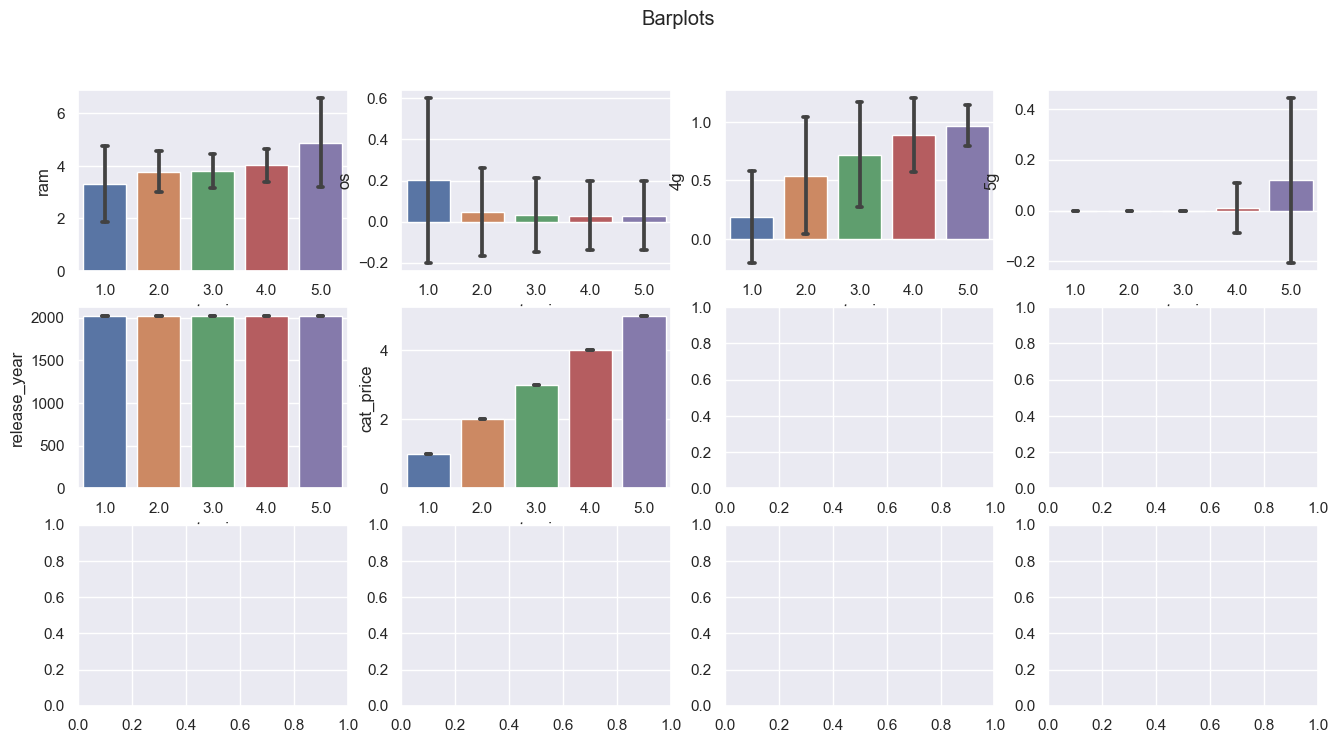

In [114]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.suptitle('Barplots')

i = 0
for col in df_cat.columns:
    sns.barplot(ax = axes[i//4,i%4], y=col, x='cat_price', data=df_cat, errorbar = "sd", capsize = 0.1, estimator=np.mean)  
    i = i + 1
    # graph1.axhline(1.0, linestyle="dashed")

# Notes

### Distibution of prices
* Nice distribution (check if its poisson or gauss or else)
* Battery distribution
* Used price vs year - some trend
* Ram vs year - maybe something there
* Double plot for year distribution (with hue for has or has not 5G)
* Days used 

### Functional correlations
* Old vs. New price - good linear correlation
* Rear_camera_MP vs Price - maybe something there
* Screen size vs battery - maybe something there
* Screen size vs weight - maybe something there
* Ram vs price - appears to increase on average

### Other

* Battery vs used price has some funny splitting - check battery vs used price scatters, with hues 

### Data analisys stage

<AxesSubplot: xlabel='normalized_used_price', ylabel='battery'>

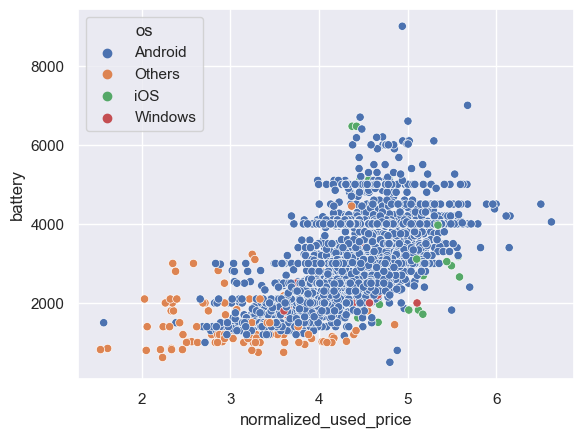

In [115]:
sns.scatterplot(y='battery', x='normalized_used_price', hue='os', data=df)

<AxesSubplot: xlabel='normalized_used_price', ylabel='battery'>

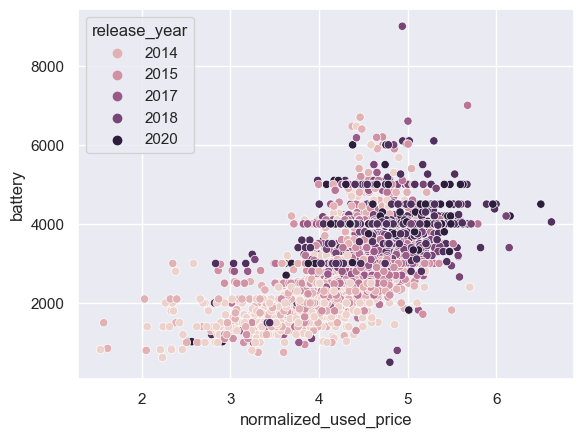

In [116]:
sns.scatterplot(y='battery', x='normalized_used_price', hue='release_year', data=df)

<AxesSubplot: xlabel='normalized_used_price', ylabel='rear_camera_mp'>

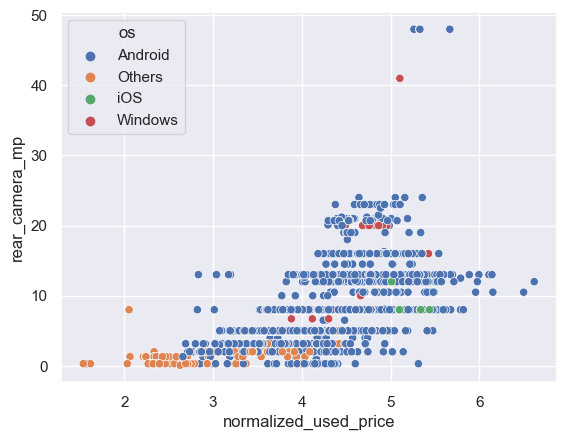

In [117]:
sns.scatterplot(y='rear_camera_mp', x='normalized_used_price', hue='os', data=df)

<AxesSubplot: xlabel='screen_size', ylabel='battery'>

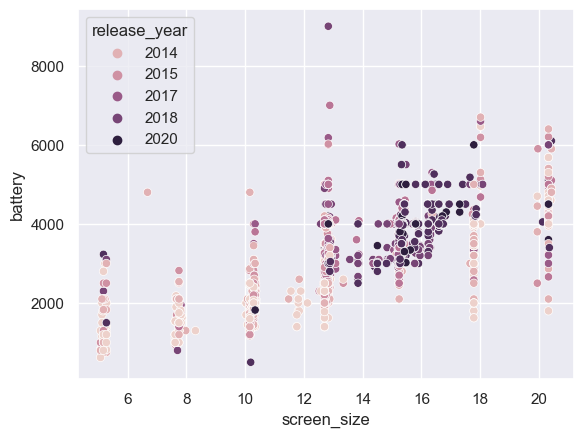

In [118]:
sns.scatterplot(y='battery', x='screen_size', hue='release_year', data=df)

<AxesSubplot: xlabel='screen_size', ylabel='battery'>

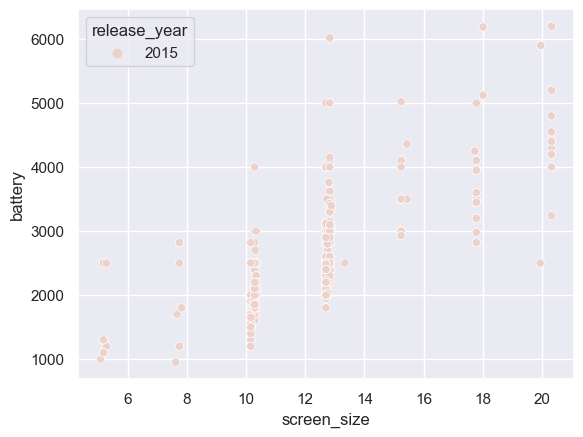

In [119]:
sns.scatterplot(y='battery', x='screen_size', hue='release_year', data=df[df['release_year'] == 2015])

<AxesSubplot: xlabel='screen_size', ylabel='battery'>

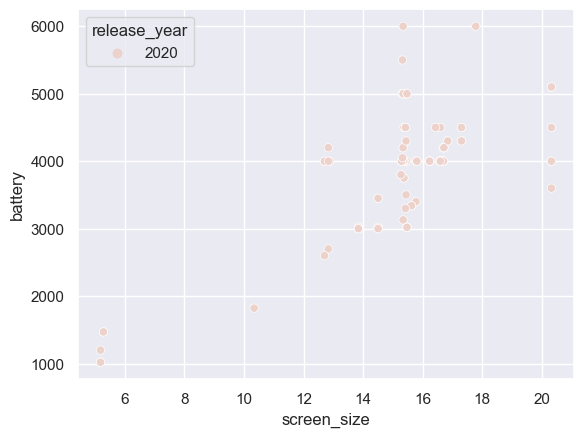

In [120]:
sns.scatterplot(y='battery', x='screen_size', hue='release_year', data=df[df['release_year'] == 2020])

In [121]:
# df['release_year_generalized'] = df['release_year'].apply(lambda x: '2013 & 2014' if x == '2013' or '2014' else x)
# df['release_year_generalized'] = df['release_year'].apply(lambda x: '2015 & 2016' if x == '2015' or '2016' else x)
# df['release_year_generalized'] = df['release_year'].apply(lambda x: '2017 & 2018' if x == '2017' or '2018' else x)
# df['release_year_generalized'] = df['release_year'].apply(lambda x: '2019 & 2020' if x == '2019' or '2020' else x)

new_series = []
for index, row in df[['release_year']].iterrows():
    x = row[0]
    if x == 2013 or x == 2014:
        new_series.append('2013 & 2014')
    elif x == 2015 or x == 2016:
        new_series.append('2015 & 2016')
    elif x == 2017 or x == 2018:
        new_series.append('2017 & 2018')
    elif x == 2019 or x == 2020:
        new_series.append('2019 & 2020')
    else:
        new_series.append('2021 & 2022')

In [122]:
df['release_year_generalized'] = new_series

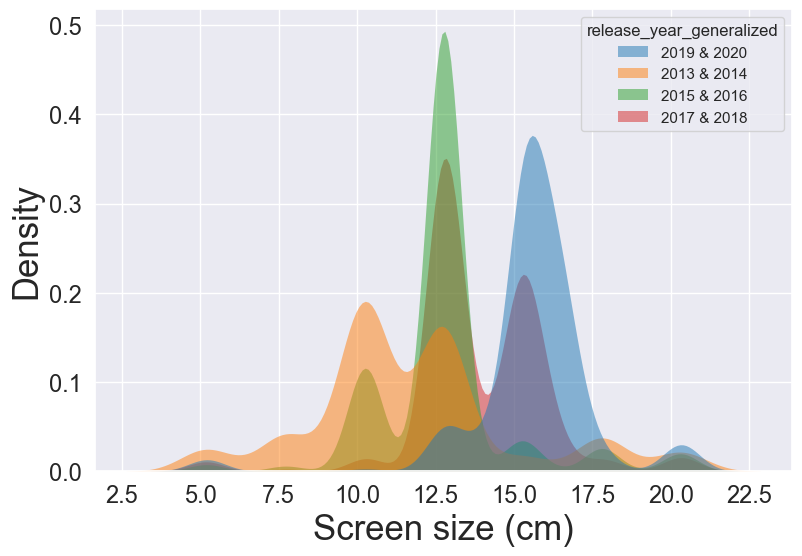

In [123]:
plt.figure(figsize=(9, 6), dpi=100) # width and height in inches
plot = sns.kdeplot(
   data=df, x="screen_size", hue="release_year_generalized",
   fill=True, common_norm=False, palette="tab10",
   alpha=.5, linewidth=0, warn_singular=False
)
plot.set_xlabel("Screen size (cm)",fontsize=25)
plot.set_ylabel("Density",fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('KDE_of_screen_size_by_year.png', transparent=True, bbox_inches='tight')
plt.show() 


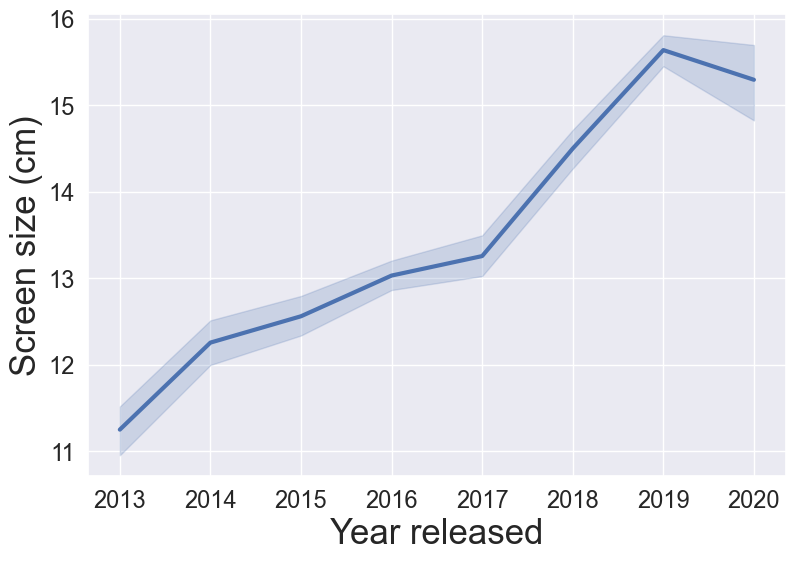

In [124]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.lineplot(x='release_year', y='screen_size', data=df, linewidth=3, markers=True) 
plot.set_xlabel("Year released", fontsize=25)
plot.set_ylabel("Screen size (cm)", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('year_vs_screen_size.png', transparent=True, bbox_inches='tight')
plt.show() 

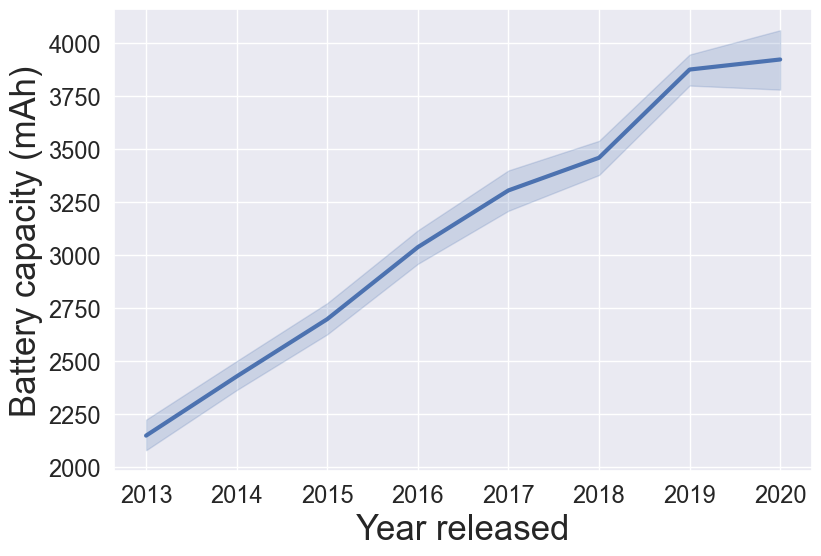

In [125]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.lineplot(x='release_year', y='battery', data=df, linewidth=3, markers=True) 
plot.set_xlabel("Year released", fontsize=25)
plot.set_ylabel("Battery capacity (mAh)", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('year_vs_battery.png', transparent=True, bbox_inches='tight')
plt.show() 

<AxesSubplot: xlabel='release_year', ylabel='screen_size'>

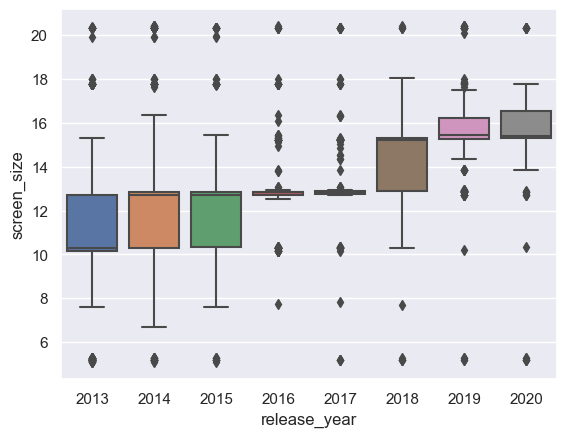

In [126]:
sns.boxplot(x='release_year', y='screen_size', data=df)

<AxesSubplot: xlabel='release_year', ylabel='ram'>

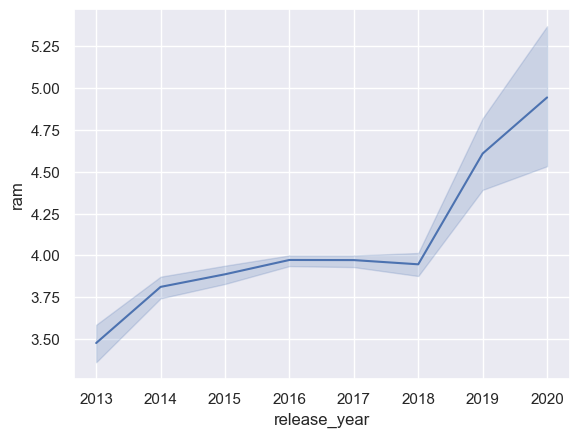

In [127]:
sns.lineplot(x='release_year', y='ram', data=df)

<AxesSubplot: xlabel='release_year', ylabel='ram'>

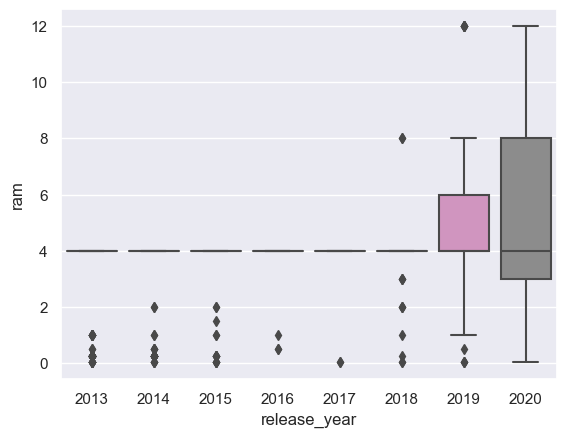

In [128]:
sns.boxplot(x='release_year', y='ram', data=df)

In [129]:
df

,index,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,used_price,new_price,cat_price,release_year_generalized
0,0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,292.527245,320.202458,3,2019 & 2020
1,1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,350.557983,374.796508,5,2019 & 2020
2,2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,347.093698,399.625272,5,2019 & 2020
3,4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,298.124547,336.007643,3,2019 & 2020
4,5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694,299.747175,343.671763,3,2019 & 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933,346.402287,427.013524,5,2019 & 2020
3108,3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538,342.112348,424.541927,5,2017 & 2018
3109,3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,295.907615,307.552774,3,2019 & 2020
3110,3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,295.392315,314.028620,3,2019 & 2020


In [130]:
df["4g"].value_counts()

yes    2059
no     1053
Name: 4g, dtype: int64

In [131]:
df["5g"].value_counts()

no     3032
yes      80
Name: 5g, dtype: int64

In [132]:
df["release_year"].value_counts()

2014    611
2013    542
2015    487
2019    382
2016    368
2018    296
2017    285
2020    141
Name: release_year, dtype: int64

In [133]:
df_used = df[['release_year','days_used','used_price']].copy()
df_used['new_or_used'] = "Used"
df_used.rename(columns={"used_price":'price'}, inplace=True)

df_new = df[['release_year','days_used','new_price']].copy()
df_new['new_or_used'] = "New"
df_new.rename(columns={"new_price":'price'}, inplace=True)

df_tot = pd.concat([df_used, df_new])
df_tot

,release_year,days_used,price,new_or_used
0,2020,127,292.527245,Used
1,2020,325,350.557983,Used
2,2020,162,347.093698,Used
3,2020,293,298.124547,Used
4,2020,223,299.747175,Used
...,...,...,...,...
3107,2019,208,427.013524,New
3108,2018,541,424.541927,New
3109,2020,201,307.552774,New
3110,2020,149,314.028620,New


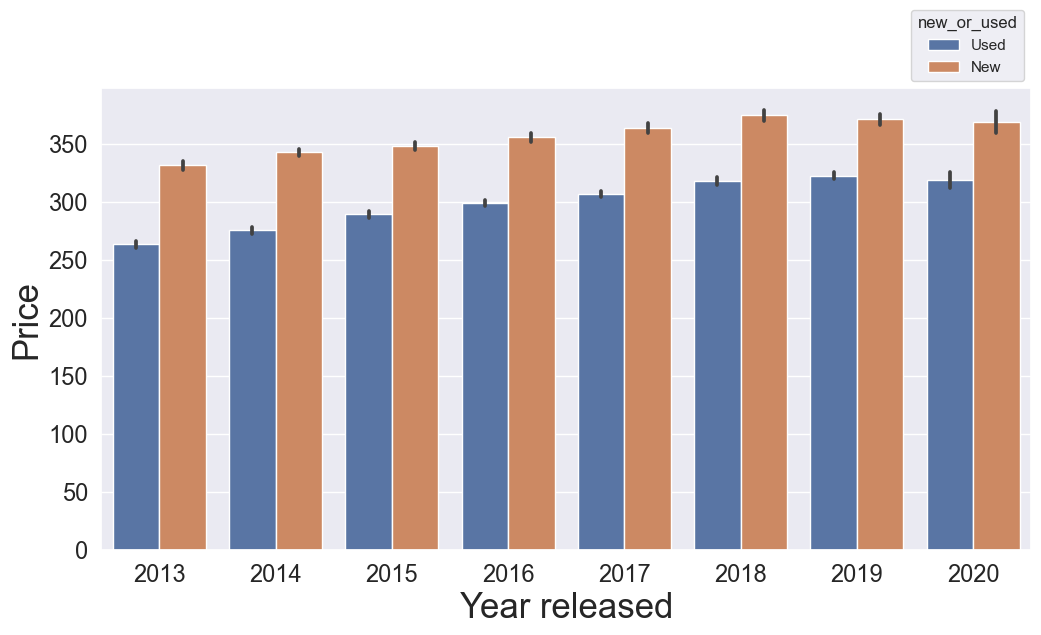

In [134]:
plt.figure(figsize=(12, 6), dpi=100) # width and height in inches
plot = sns.barplot(x='release_year', y='price', hue='new_or_used', data=df_tot)
plot.set_xlabel("Year released",fontsize=25)
plot.set_ylabel("Price",fontsize=25)
plot.tick_params(labelsize=17)
sns.move_legend(plot, "lower right", bbox_to_anchor=(1, 1))
plt.savefig('Price_vs_Year_double_barplot.png', transparent=True, bbox_inches='tight')
plt.show() 

In [135]:
df['price_ratio'] = 100*df['used_price']/df['new_price']

In [136]:
df['price_ratio']

0       91.356964
1       93.532884
2       86.854792
3       88.725525
4       87.219029
          ...    
3107    81.122088
3108    80.583878
3109    96.213606
3110    94.065412
3111    96.545042
Name: price_ratio, Length: 3112, dtype: float64

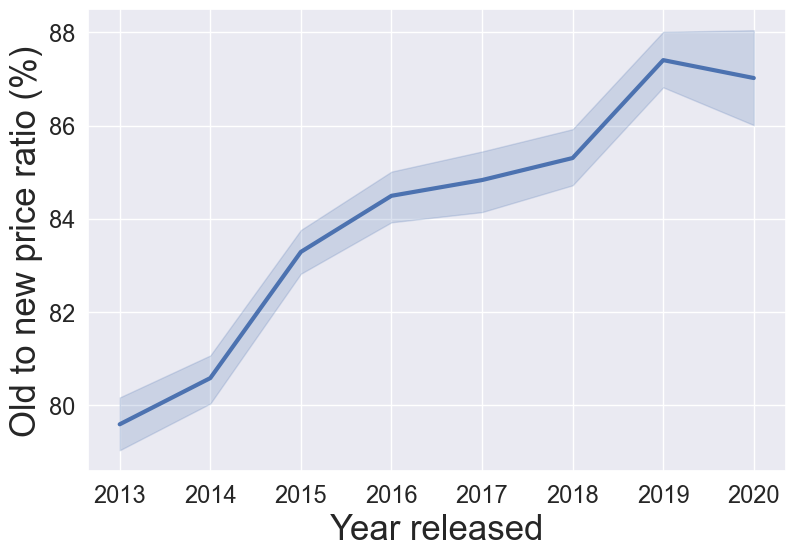

In [137]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.lineplot(x='release_year', y='price_ratio', data=df, linewidth=3, markers=True) 
plot.set_xlabel("Year released", fontsize=25)
plot.set_ylabel("Old to new price ratio (%)", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('new_to_old_price_ratio.png', transparent=True, bbox_inches='tight')
plt.show() 

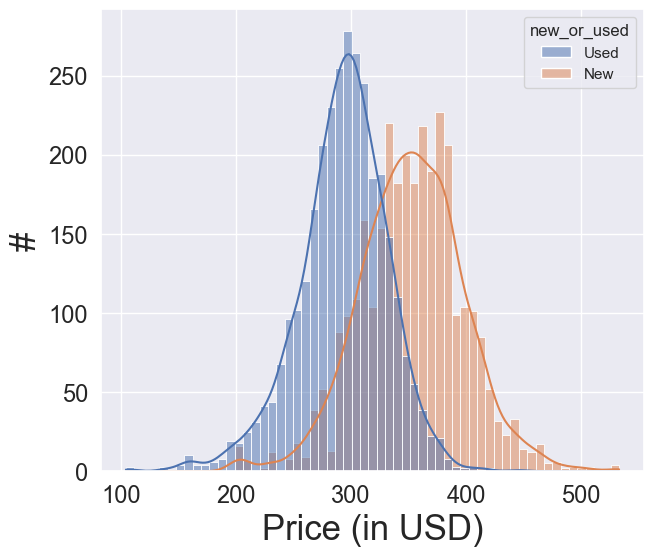

In [138]:
plt.figure(figsize=(7, 6), dpi=100) # width and height in inches
plot = sns.histplot(data=df_tot, x='price', hue='new_or_used', kde=True)  
plot.set_xlabel("Price (in USD)",fontsize=25)
plot.set_ylabel("#",fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('histograms_of_prices.png', transparent=True, bbox_inches='tight')
plt.show() 

# the mediam of the used is 296 +- 40
# the median of the new is 355 +- 46

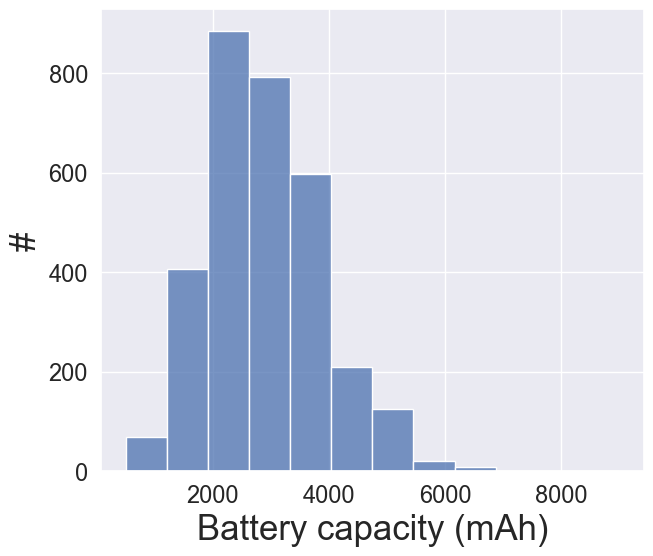

In [139]:
plt.figure(figsize=(7, 6), dpi=100) # width and height in inches
plot = sns.histplot(data=df, x='battery', bins=12, kde=False)  
plot.set_xlabel("Battery capacity (mAh)",fontsize=25)
plot.set_ylabel("#",fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('histograms_of_battery.png', transparent=True, bbox_inches='tight')
plt.show() 

# mean

In [140]:
df.battery[(df.battery >= 1700) & (df.battery <= 4100)].count()/df.battery.count()

0.8129820051413882

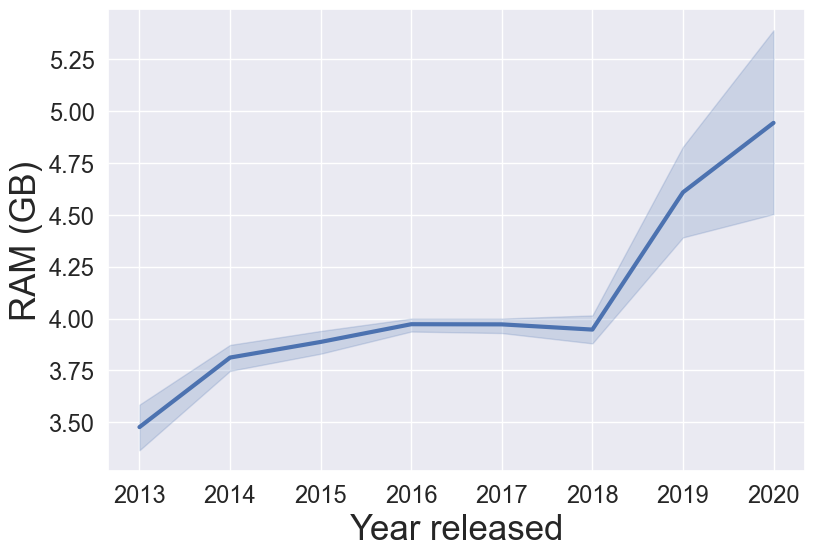

In [141]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.lineplot(x='release_year', y='ram', data=df, linewidth=3, markers=True) 
plot.set_xlabel("Year released", fontsize=25)
plot.set_ylabel("RAM (GB)", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('ram_vs_year.png', transparent=True, bbox_inches='tight')
plt.show() 

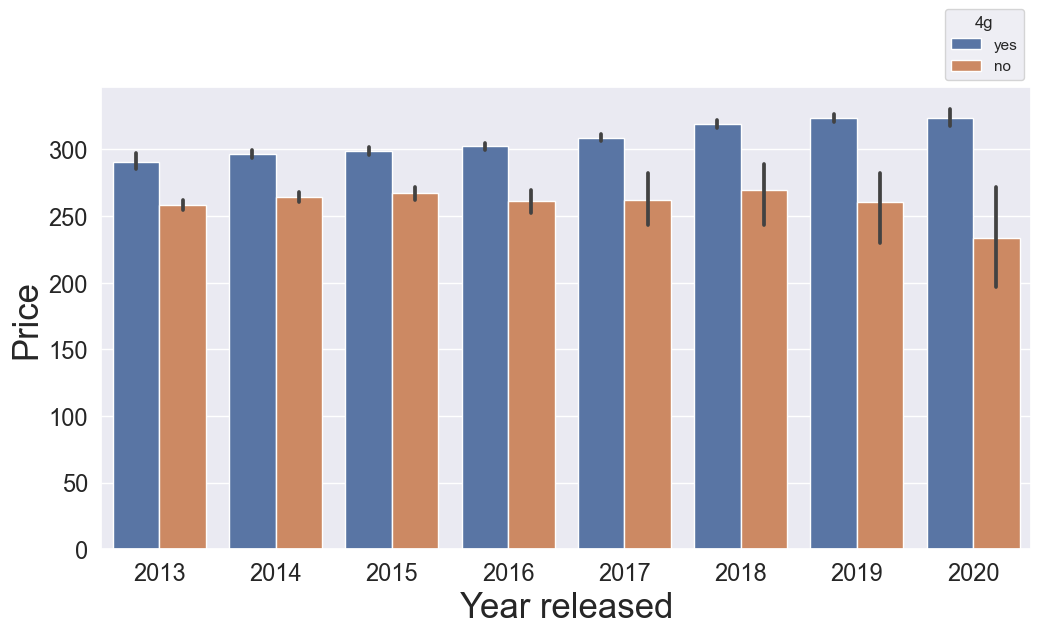

In [142]:
plt.figure(figsize=(12, 6), dpi=100) # width and height in inches
plot = sns.barplot(x='release_year', y='used_price', hue='4g', data=df)
plot.set_xlabel("Year released",fontsize=25)
plot.set_ylabel("Price",fontsize=25)
plot.tick_params(labelsize=17)
sns.move_legend(plot, "lower right", bbox_to_anchor=(1, 1))
plt.savefig('foo.png', transparent=True, bbox_inches='tight')
plt.show() 

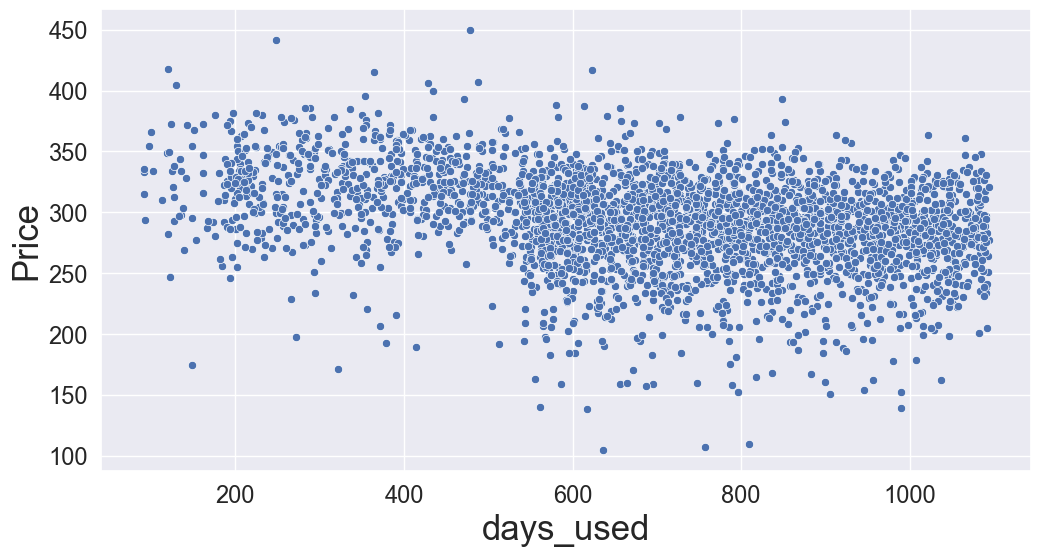

In [143]:
plt.figure(figsize=(12, 6), dpi=100) # width and height in inches
plot = sns.scatterplot(x='days_used', y='used_price', data=df)
plot.set_xlabel("days_used",fontsize=25)
plot.set_ylabel("Price",fontsize=25)
plot.tick_params(labelsize=17)
# sns.move_legend(plot, "lower right", bbox_to_anchor=(1, 1))
plt.savefig('foo.png', transparent=True, bbox_inches='tight')
plt.show() 

In [144]:
df.used_price[df.days_used <= 500].mean()

322.2296869234745

In [145]:
df.used_price[df.days_used >= 500].mean()

286.1424547110559

In [146]:
#df['years_used'], cut_bin = pd.qcut(df['days_used'], q = 7, labels = ['0.5', '1', '1.5', '2', '2.5', '3', '3.5'], retbins = True)

df['years_used'] = pd.cut(df.days_used, 6, labels=['0.5', '1', '1.5', '2', '2.5', '3'])

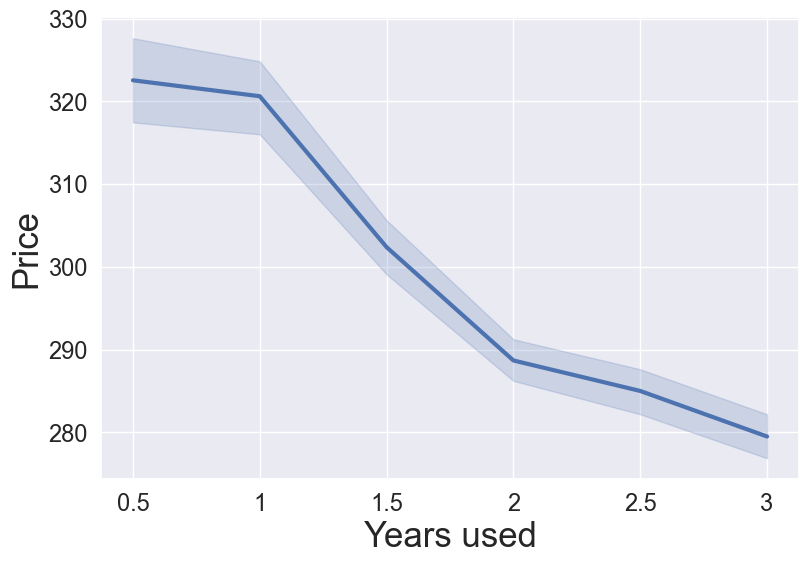

In [147]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.lineplot(x='years_used', y='used_price', data=df, linewidth=3, markers=True) 
plot.set_xlabel("Years used", fontsize=25)
plot.set_ylabel("Price", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('price_vs_years_used.png', transparent=True, bbox_inches='tight')
plt.show() 

In [148]:
280/323

0.8668730650154799

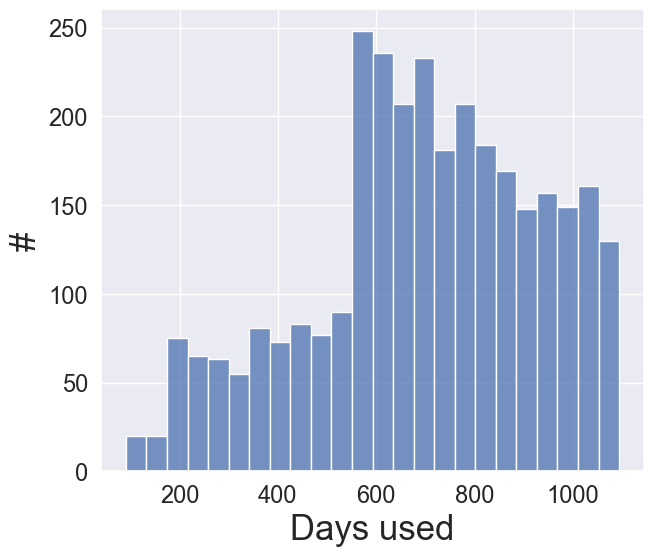

In [149]:
plt.figure(figsize=(7, 6), dpi=100) # width and height in inches
plot = sns.histplot(data=df, x='days_used', kde=False)  
plot.set_xlabel("Days used",fontsize=25)
plot.set_ylabel("#",fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('days_used_hist.png', transparent=True, bbox_inches='tight')
plt.show() 


In [150]:
df_tot

,release_year,days_used,price,new_or_used
0,2020,127,292.527245,Used
1,2020,325,350.557983,Used
2,2020,162,347.093698,Used
3,2020,293,298.124547,Used
4,2020,223,299.747175,Used
...,...,...,...,...
3107,2019,208,427.013524,New
3108,2018,541,424.541927,New
3109,2020,201,307.552774,New
3110,2020,149,314.028620,New


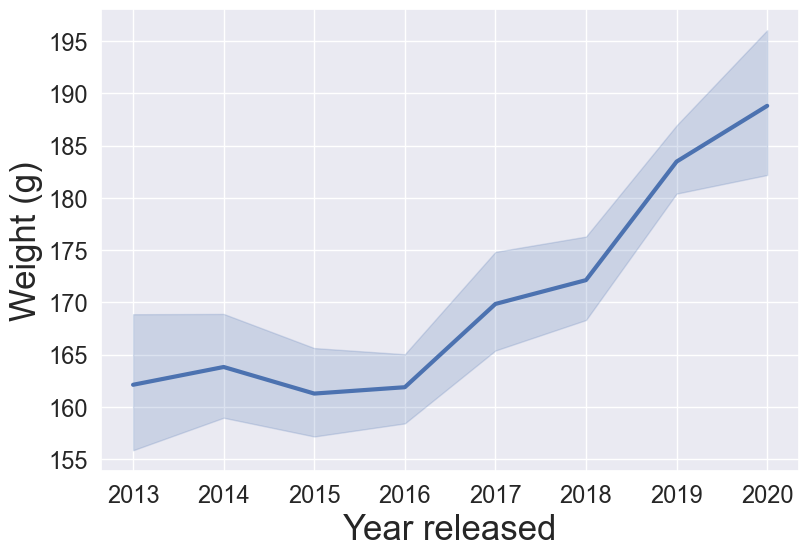

In [151]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.lineplot(x='release_year', y='weight', data=df, linewidth=3, markers=True) 
plot.set_xlabel("Year released", fontsize=25)
plot.set_ylabel("Weight (g)", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('weight_vs_year', transparent=True, bbox_inches='tight')
plt.show() 

In [152]:
189/162

1.1666666666666667

In [153]:
df

,index,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,...,release_year,days_used,normalized_used_price,normalized_new_price,used_price,new_price,cat_price,release_year_generalized,price_ratio,years_used
0,0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,...,2020,127,4.307572,4.715100,292.527245,320.202458,3,2019 & 2020,91.356964,0.5
1,1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,...,2020,325,5.162097,5.519018,350.557983,374.796508,5,2019 & 2020,93.532884,1
2,2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,...,2020,162,5.111084,5.884631,347.093698,399.625272,5,2019 & 2020,86.854792,0.5
3,4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,...,2020,293,4.389995,4.947837,298.124547,336.007643,3,2019 & 2020,88.725525,1
4,5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,...,2020,223,4.413889,5.060694,299.747175,343.671763,3,2019 & 2020,87.219029,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,...,2019,208,5.100902,6.287933,346.402287,427.013524,5,2019 & 2020,81.122088,0.5
3108,3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,...,2018,541,5.037732,6.251538,342.112348,424.541927,5,2017 & 2018,80.583878,1.5
3109,3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,...,2020,201,4.357350,4.528829,295.907615,307.552774,3,2019 & 2020,96.213606,0.5
3110,3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,...,2020,149,4.349762,4.624188,295.392315,314.028620,3,2019 & 2020,94.065412,0.5


In [154]:
# plt.figure(figsize=(9, 6), dpi = 100)
# plot = sns.scatterplot(x='rear_camera_mp', y='used_price', data=df, linewidth=3, markers=True) 
# plot.set_xlabel("Year released", fontsize=25)
# plot.set_ylabel("Weight (g)", fontsize=25)
# plot.tick_params(labelsize=17)
# plt.savefig('camera_vs_price', transparent=True, bbox_inches='tight')
# plt.show() 

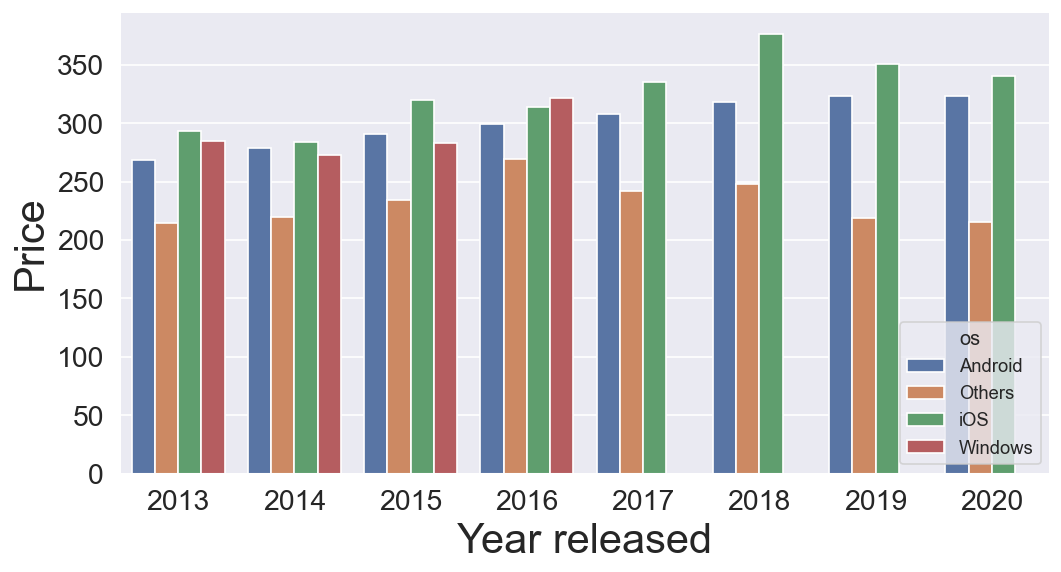

In [155]:
plt.figure(figsize=(10, 5), dpi=120) # width and height in inches
plot = sns.barplot(x='release_year', y='used_price', hue='os', data=df, errorbar = None, capsize = 0.05, estimator=np.mean)
plot.set_xlabel("Year released",fontsize=25)
plot.set_ylabel("Price",fontsize=25)
plot.tick_params(labelsize=17)
sns.move_legend(plot, "lower right")
plt.savefig('price_by_year_by-OS.png', transparent=True, bbox_inches='tight')
plt.show() 

In [156]:
df.os.value_counts()

Android    2900
Others      124
Windows      64
iOS          24
Name: os, dtype: int64

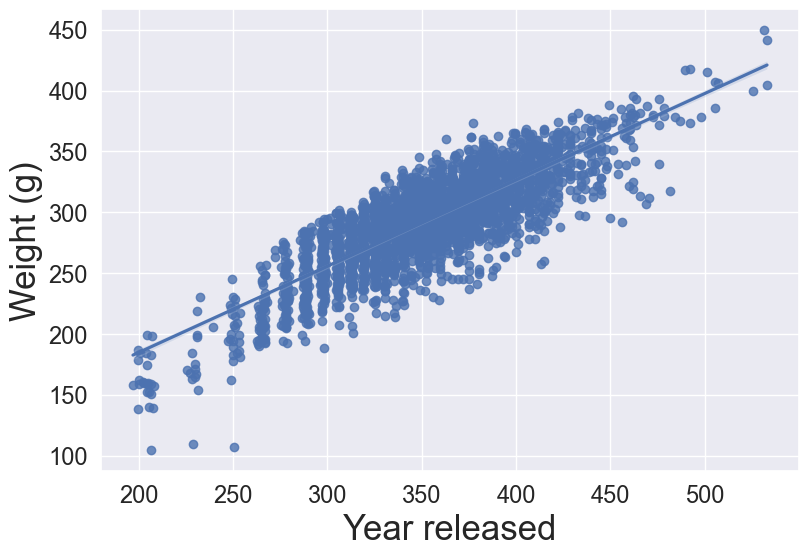

In [157]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.regplot(x='new_price', y='used_price', data=df) 
plot.set_xlabel("Year released", fontsize=25)
plot.set_ylabel("Weight (g)", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('camera_vs_price', transparent=True, bbox_inches='tight')
plt.show() 

In [158]:
df_modified = df[df.os == 'Android'].drop(['device_brand','4g','5g','os','index','years_used','release_year_generalized','normalized_new_price','normalized_used_price','price_ratio', 'cat_price'], axis=1)

In [159]:
df_modified

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,used_price,new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,292.527245,320.202458
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,350.557983,374.796508
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,347.093698,399.625272
3,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,298.124547,336.007643
4,16.23,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,299.747175,343.671763
...,...,...,...,...,...,...,...,...,...,...,...
3103,14.81,8.0,5.0,32.0,2.0,3000.0,141.0,2019,383,284.632543,292.636895
3108,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,342.112348,424.541927
3109,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,295.907615,307.552774
3110,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,295.392315,314.028620


In [160]:
df_modified.to_csv("data_prepared_for_ML.csv", index=False)